In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Manager\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv(r"C:\Users\Manager\springboard projects\second capstone\employee.csv")

ThE TWO STEP OF  DSM ALREADY COMPLETED.NOW ITS TURN FOR EDA.

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

seeing the previous analysis.There is no null value in the dataset.Therefore we can start our new anlaysis of variable interaction.

# DATA PROFILE

In [4]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
# No null value
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# Let's replace 'Attrition' , 'overtime' , 'Over18' column with integers before performing any visualizations 
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Attrition'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeNumber'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'Relations

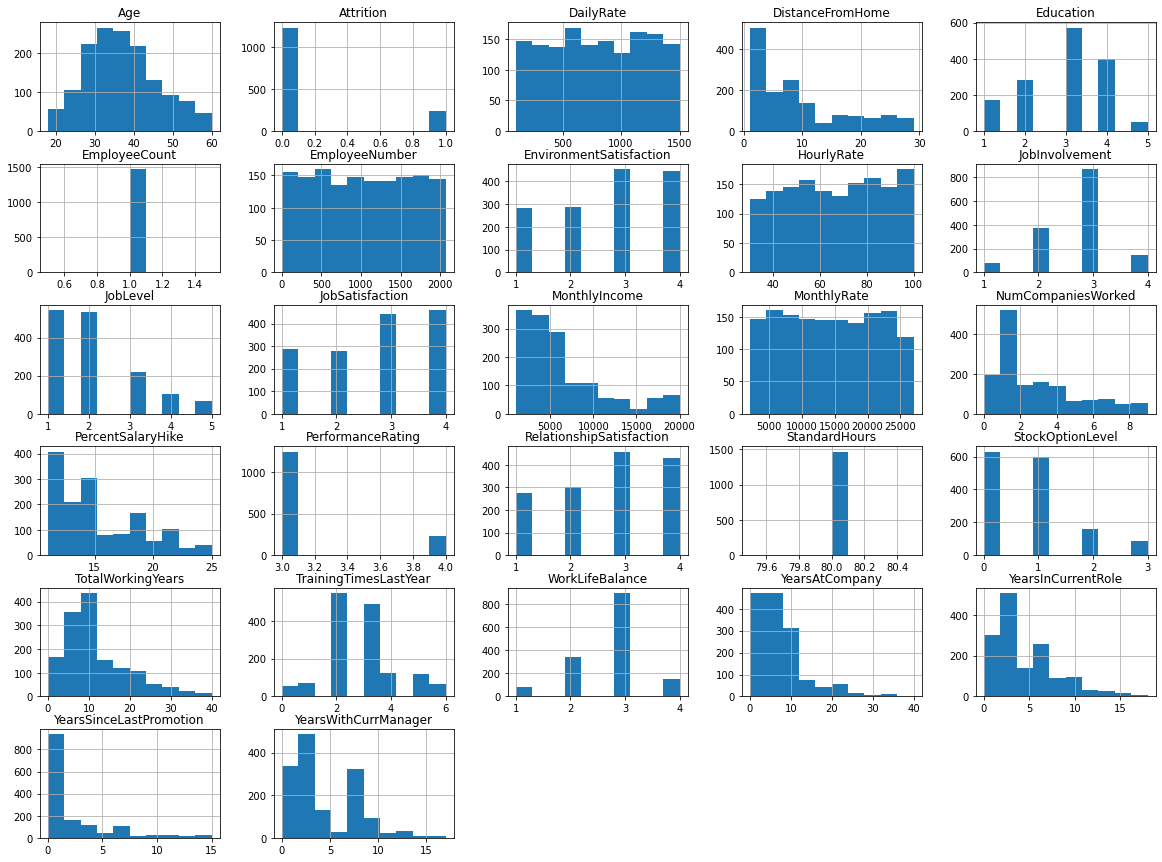

In [7]:
df.hist(bins=10,figsize=(20,15))

In [8]:
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavly
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

In [9]:
df.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
Attrition                 1470.0      0.161224     0.367863     0.0     0.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
Attrition                     0.0      0.00      1.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

# categorical variable analysis

In [10]:
df_cat=df.select_dtypes(include=['object'])

In [11]:
df_cat.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

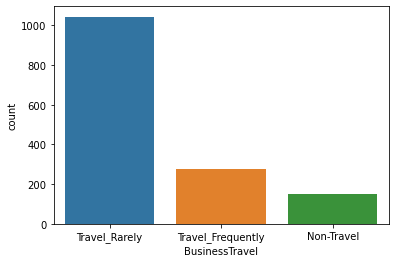

In [12]:
sns.countplot(data = df_cat, x = 'BusinessTravel')

<AxesSubplot:xlabel='Department', ylabel='count'>

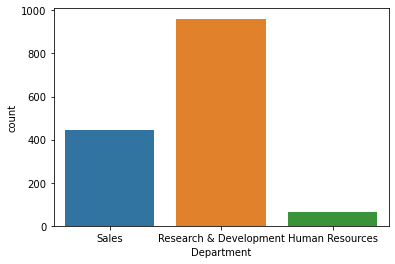

In [13]:
df_cat.Department.value_counts()
sns.countplot(data = df_cat, x = 'Department')


<AxesSubplot:xlabel='EducationField', ylabel='count'>

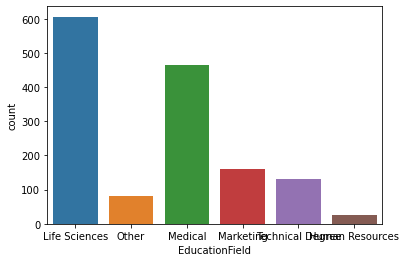

In [14]:
sns.countplot(data = df_cat, x = 'EducationField')

<AxesSubplot:xlabel='Gender', ylabel='count'>

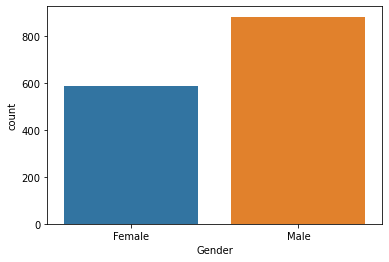

In [15]:
sns.countplot(data = df_cat, x = 'Gender')

<AxesSubplot:xlabel='JobRole', ylabel='count'>

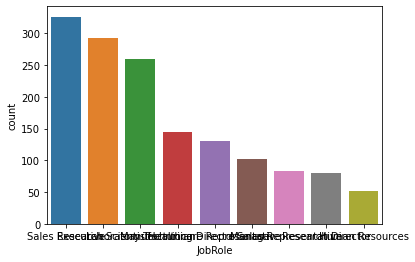

In [16]:
sns.countplot(data = df_cat, x = 'JobRole')

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

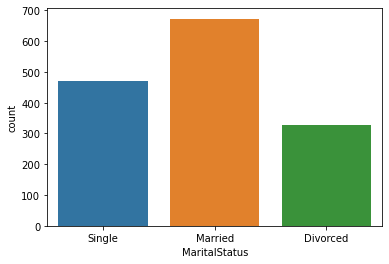

In [17]:
sns.countplot(data = df_cat, x = 'MaritalStatus')

<AxesSubplot:xlabel='Over18', ylabel='count'>

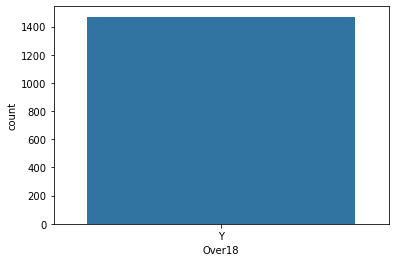

In [18]:
sns.countplot(data = df_cat, x = 'Over18')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

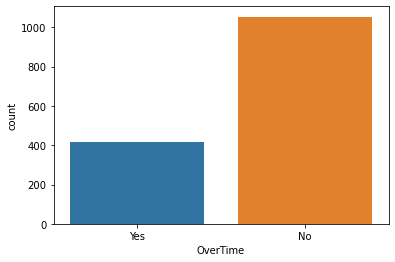

In [19]:
sns.countplot(data = df_cat, x = 'OverTime')

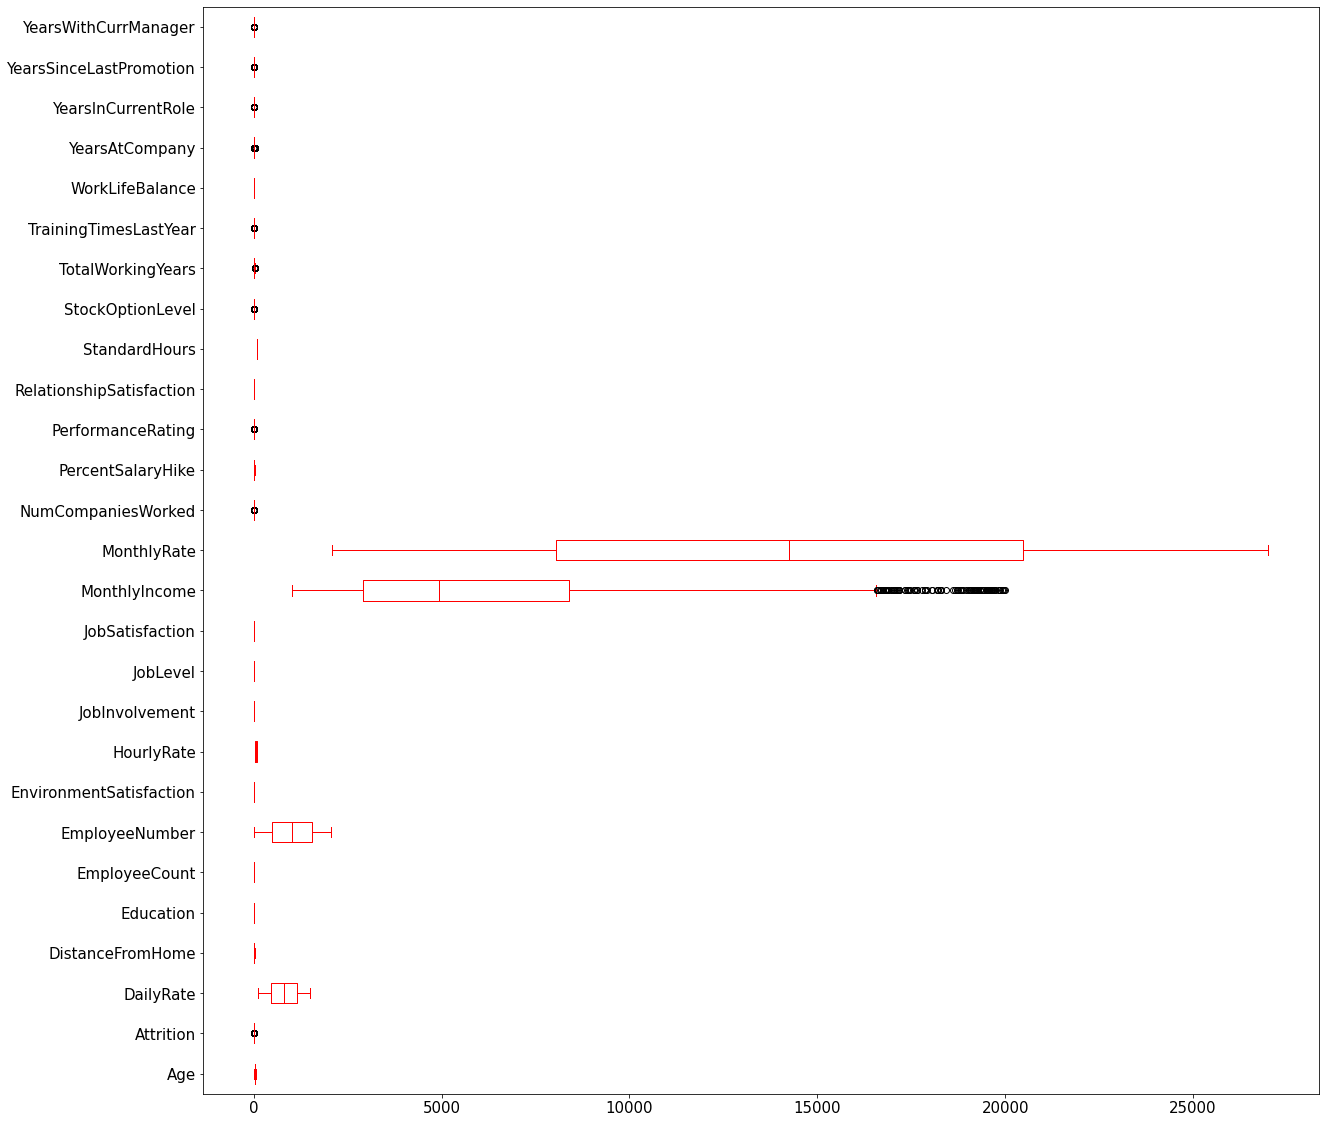

In [20]:
plt.figure(figsize=(20,20))
boxplot = df.boxplot(grid=False, vert=False,fontsize=15,color='red')

# correlation

In [21]:
#It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other
# Let's drop 'EmployeeNumber' as well
# use inplace = True to change the values in memory.
df.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis = 1, inplace = True)

In [22]:
df.corr()

Age  Attrition  DailyRate  DistanceFromHome  \
Age                       1.000000  -0.159205   0.010661         -0.001686   
Attrition                -0.159205   1.000000  -0.056652          0.077924   
DailyRate                 0.010661  -0.056652   1.000000         -0.004985   
DistanceFromHome         -0.001686   0.077924  -0.004985          1.000000   
Education                 0.208034  -0.031373  -0.016806          0.021042   
EnvironmentSatisfaction   0.010146  -0.103369   0.018355         -0.016075   
HourlyRate                0.024287  -0.006846   0.023381          0.031131   
JobInvolvement            0.029820  -0.130016   0.046135          0.008783   
JobLevel                  0.509604  -0.169105   0.002966          0.005303   
JobSatisfaction          -0.004892  -0.103481   0.030571         -0.003669   
MonthlyIncome             0.497855  -0.159840   0.007707         -0.017014   
MonthlyRate               0.028051   0.015170  -0.032182          0.027473   
NumCompaniesWorked        0.299635   0.043494   0.038153         -0.029251   
PercentSalaryHike         0.003634  -0.013478   0.022704          0.040235   
PerformanceRating         0.001904   0.002889   0.000473          0.027110   
RelationshipSatisfaction  0.053535  -0.045872   0.007846          0.006557   
StockOptionLevel          0.037510  -0.137145   0.042143          0.044872   
TotalWorkingYears         0.680381  -0.171063   0.014515          0.004628   
TrainingTimesLastYear    -0.019621  -0.059478   0.002453         -0.036942   
WorkLifeBalance          -0.021490  -0.063939  -0.037848         -0.026556   
YearsAtCompany            0.311309  -0.134392  -0.034055          0.009508   
YearsInCurrentRole        0.212901  -0.160545   0.009932          0.018845   
YearsSinceLastPromotion   0.216513  -0.033019  -0.033229          0.010029   
YearsWithCurrManager      0.202089  -0.156199  -0.026363          0.014406   

                          Education  EnvironmentSatisfaction  HourlyRate  \
Age                        0.208034                 0.010146    0.024287   
Attrition                 -0.031373                -0.103369   -0.006846   
DailyRate                 -0.016806                 0.018355    0.023381   
DistanceFromHome           0.021042                -0.016075    0.031131   
Education                  1.000000                -0.027128    0.016775   
EnvironmentSatisfaction   -0.027128                 1.000000   -0.049857   
HourlyRate                 0.016775                -0.049857    1.000000   
JobInvolvement             0.042438                -0.008278    0.042861   
JobLevel                   0.101589                 0.001212   -0.027853   
JobSatisfaction           -0.011296                -0.006784   -0.071335   
MonthlyIncome              0.094961                -0.006259   -0.015794   
MonthlyRate               -0.026084                 0.037600   -0.015297   
NumCompaniesWorked         0.126317                 0.012594    0.022157   
PercentSalaryHike         -0.011111                -0.031701   -0.009062   
PerformanceRating         -0.024539                -0.029548   -0.002172   
RelationshipSatisfaction  -0.009118                 0.007665    0.001330   
StockOptionLevel           0.018422                 0.003432    0.050263   
TotalWorkingYears          0.148280                -0.002693   -0.002334   
TrainingTimesLastYear     -0.025100                -0.019359   -0.008548   
WorkLifeBalance            0.009819                 0.027627   -0.004607   
YearsAtCompany             0.069114                 0.001458   -0.019582   
YearsInCurrentRole         0.060236                 0.018007   -0.024106   
YearsSinceLastPromotion    0.054254                 0.016194   -0.026716   
YearsWithCurrManager       0.069065                -0.004999   -0.020123   

                          JobInvolvement  JobLevel  JobSatisfaction  ...  \
Age                             0.029820  0.509604        -0.004892  ...   
Attrition                  

<AxesSubplot:>

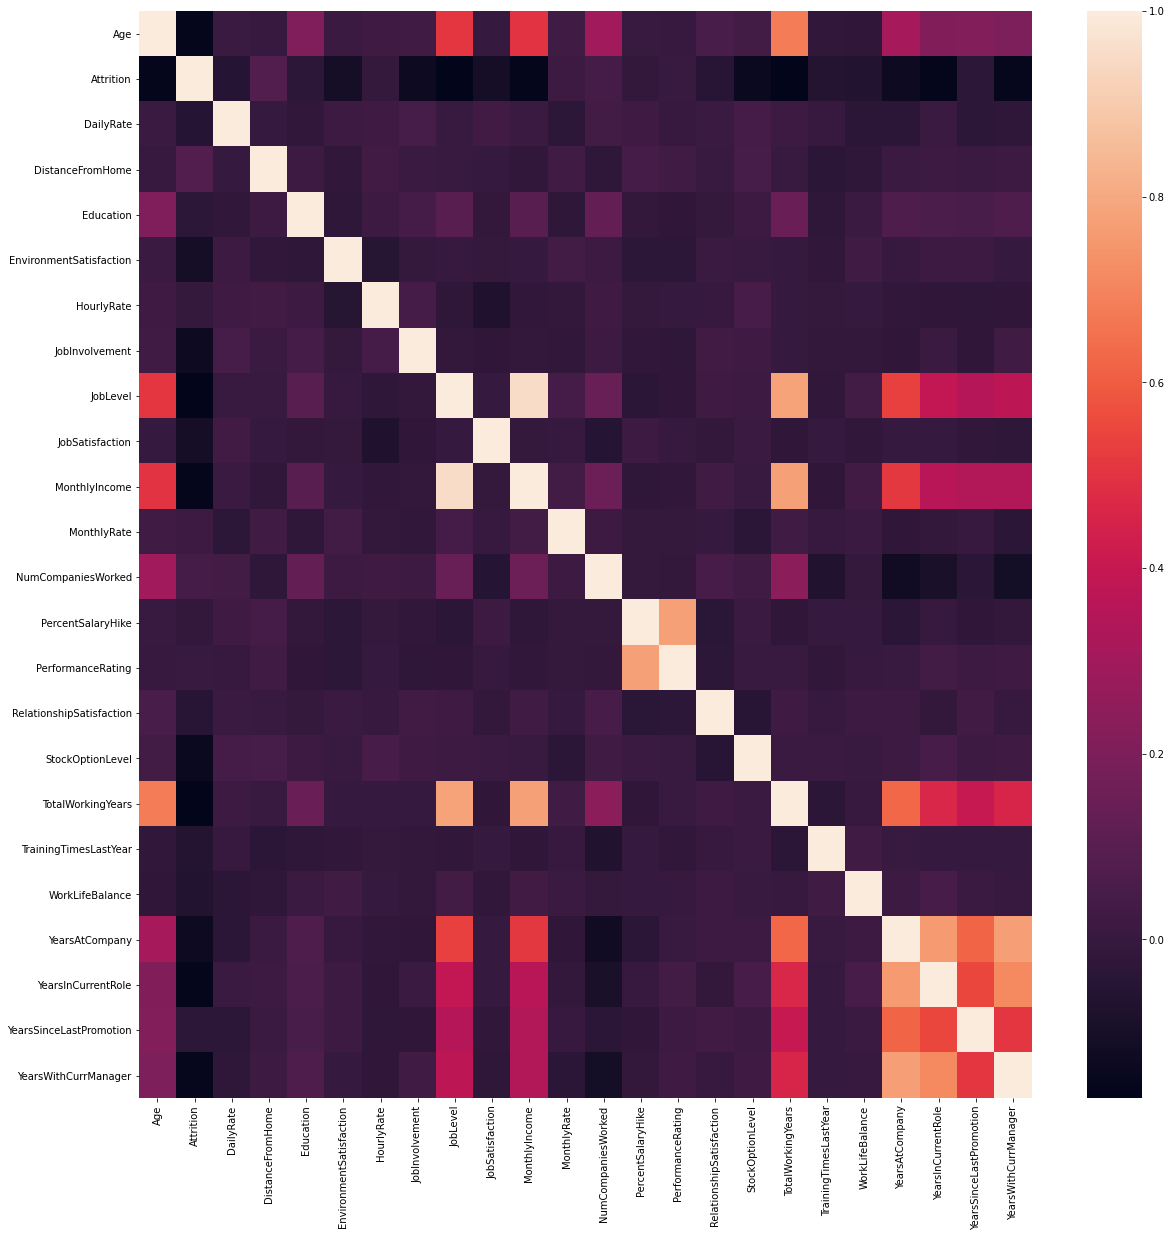

In [23]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

job level is strongly correlated with total working years

Monthly income is strongly correlated with Job level

Monthly income is strongly correlated with total working hours

Age is stongly correlated with monthly income

Also we can see that overtime has a strong affect on Attrition

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]),
 [Text(0, 0.5, 'Age'),
  Text(0, 1.5, 'Attrition'),
  Text(0, 2.5, 'DailyRate'),
  Text(0, 3.5, 'DistanceFromHome'),
  Text(0, 4.5, 'Education'),
  Text(0, 5.5, 'EnvironmentSatisfaction'),
  Text(0, 6.5, 'HourlyRate'),
  Text(0, 7.5, 'JobInvolvement'),
  Text(0, 8.5, 'JobLevel'),
  Text(0, 9.5, 'JobSatisfaction'),
  Text(0, 10.5, 'MonthlyIncome'),
  Text(0, 11.5, 'MonthlyRate'),
  Text(0, 12.5, 'NumCompaniesWorked'),
  Text(0, 13.5, 'PercentSalaryHike'),
  Text(0, 14.5, 'PerformanceRating'),
  Text(0, 15.5, 'RelationshipSatisfaction'),
  Text(0, 16.5, 'StockOptionLevel'),
  Text(0, 17.5, 'TotalWorkingYears'),
  Text(0, 18.5, 'TrainingTimesLastYear'),
  Text(0, 19.5, 'WorkLifeBalance'),
  Text(0, 20.5, 'YearsAtCompany'),
  Text(0, 21.5, 'YearsInCurrentRole'),
  Text(0, 22.5, 'YearsSinceLastPromotion'),
  Text(0, 23.5, '

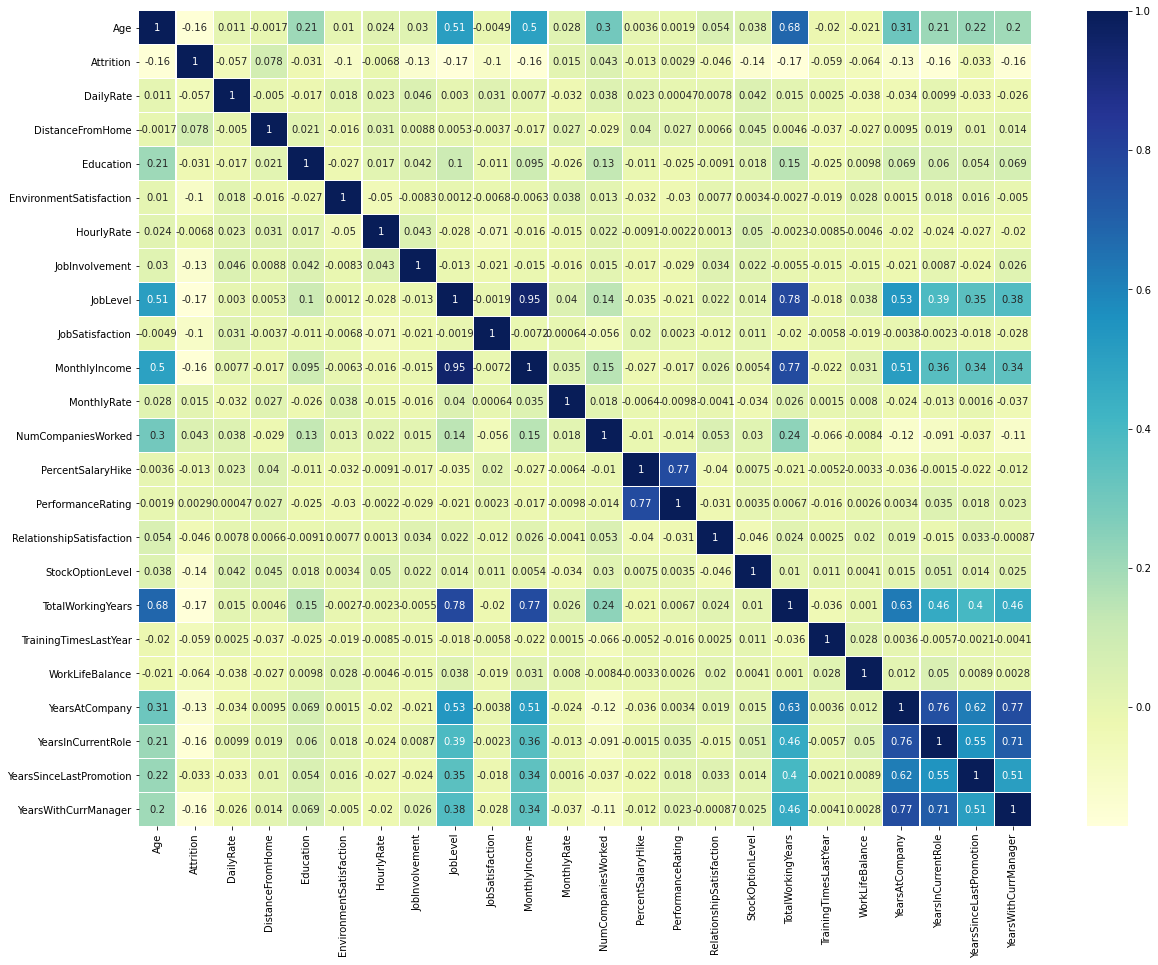

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0)

# pairplot

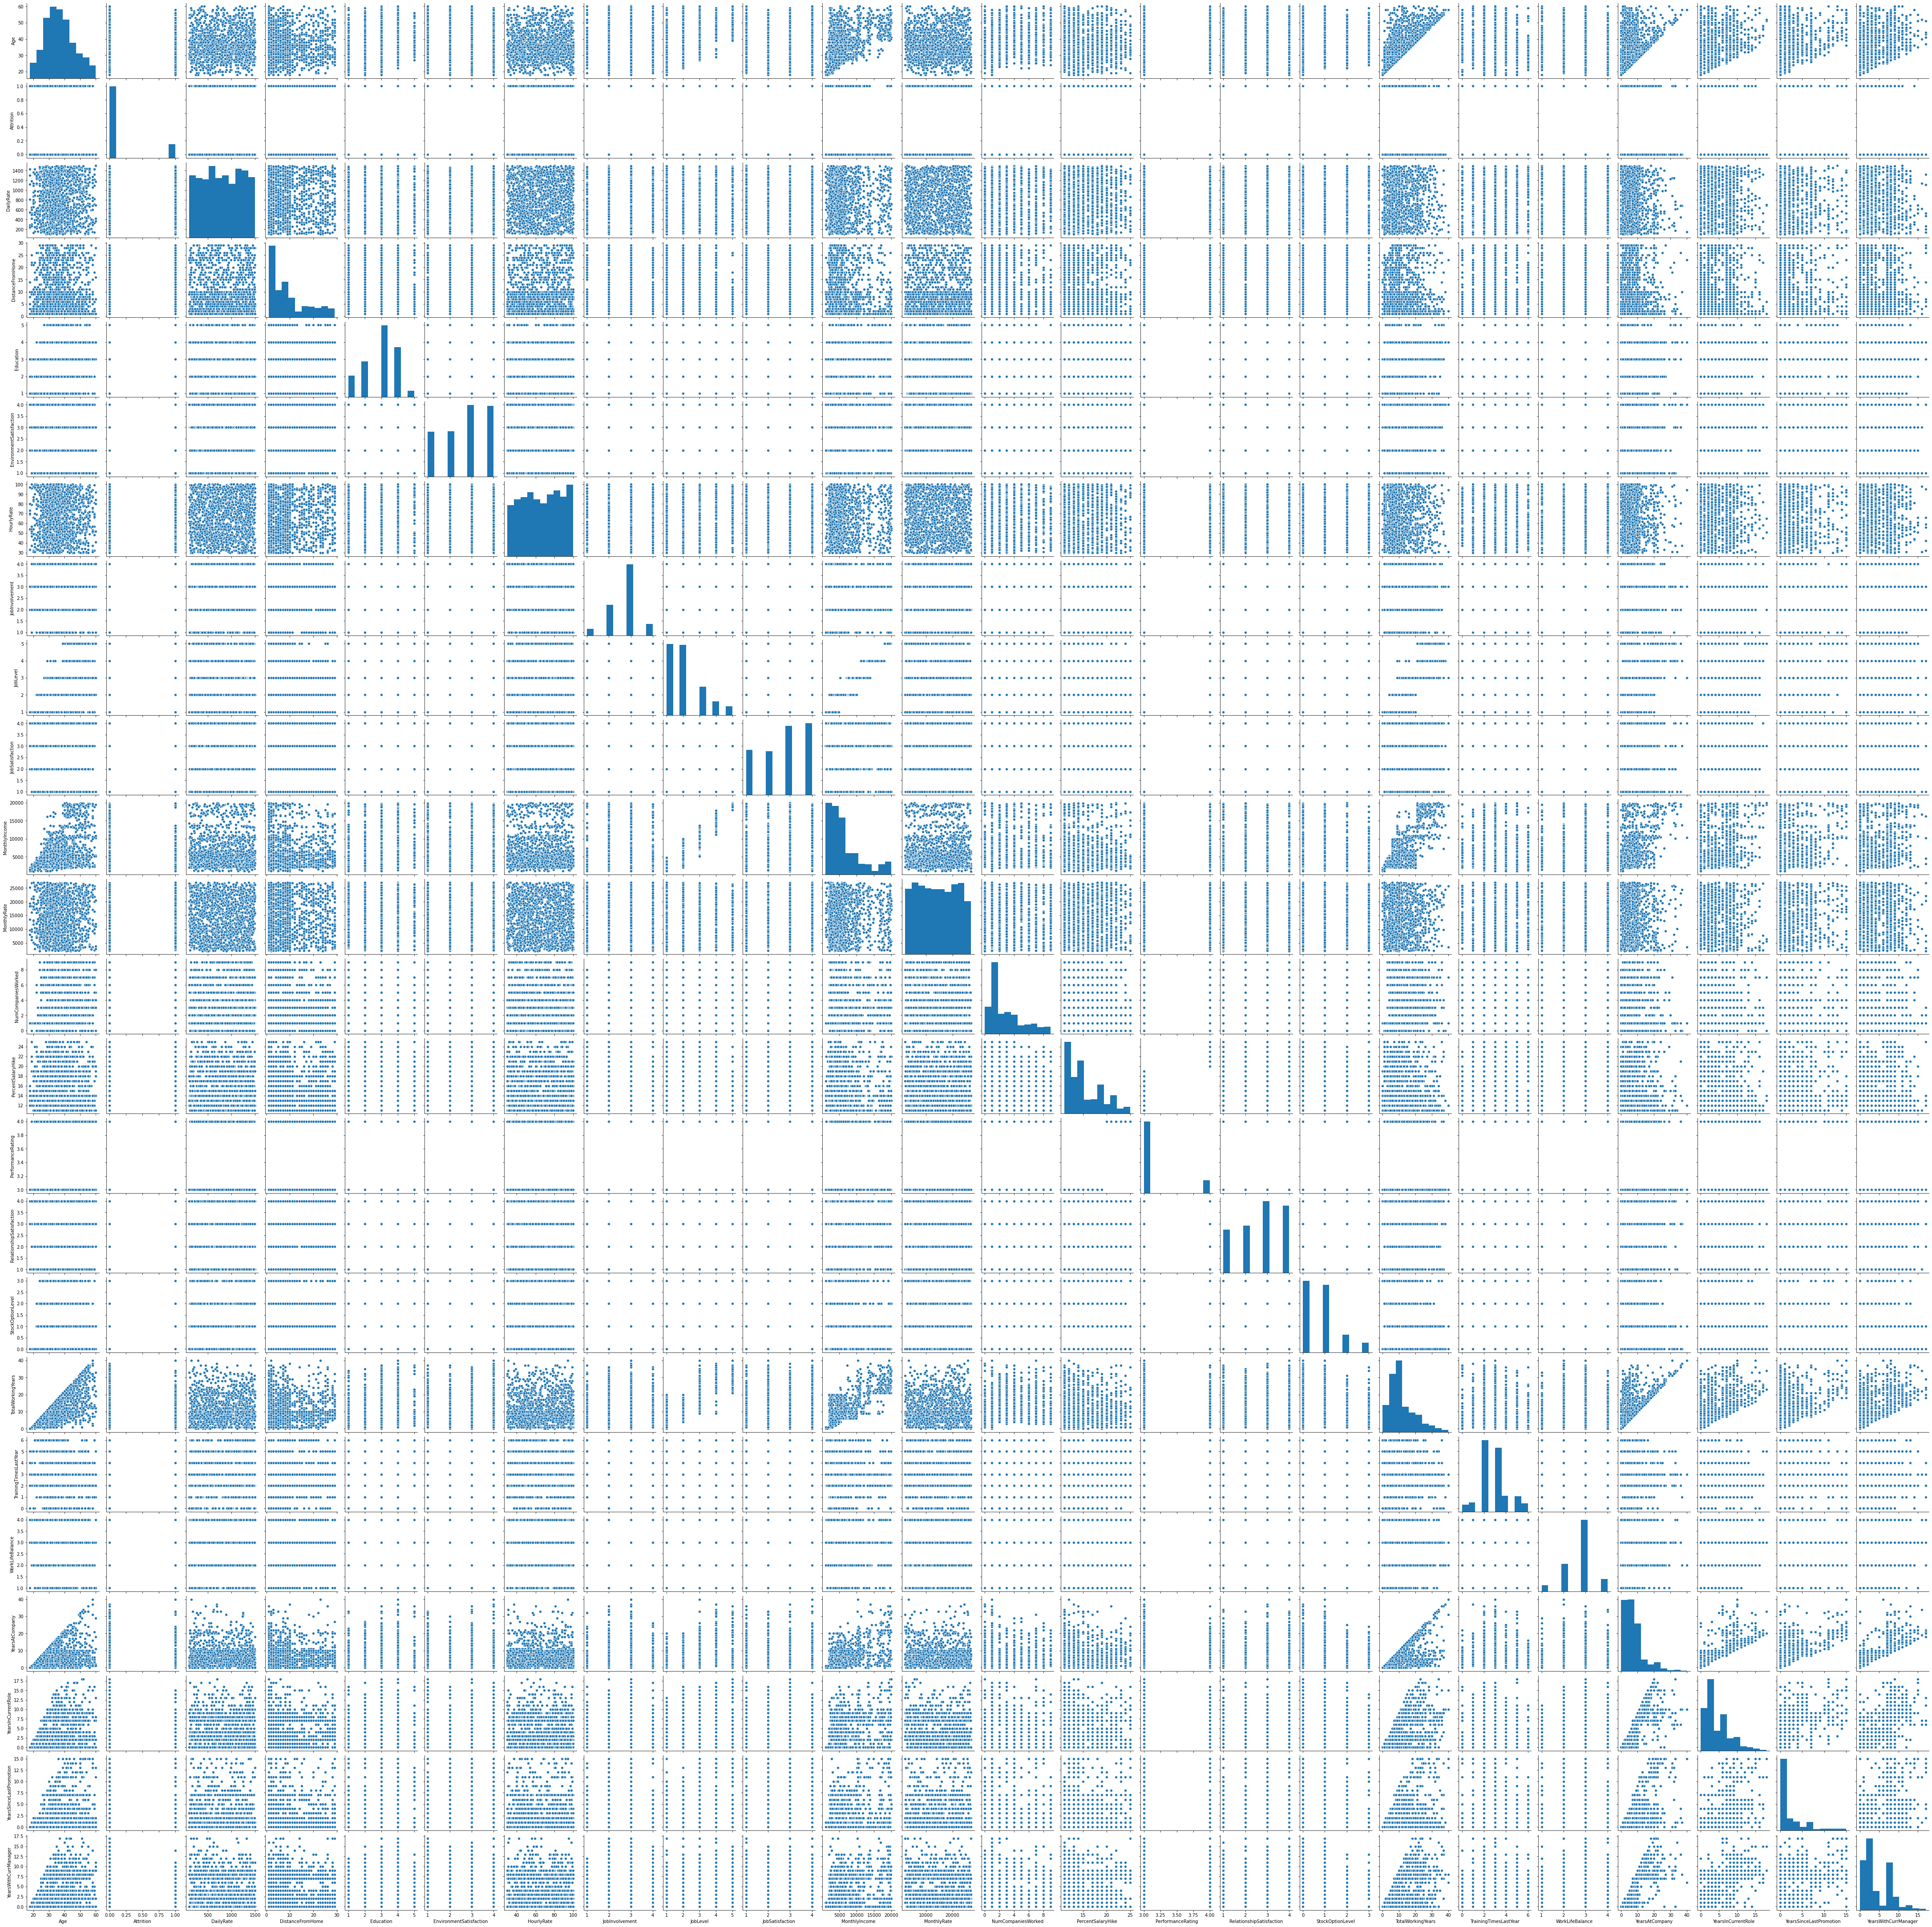

In [25]:
sns.pairplot(df)

In [26]:

# Let's see how many employees left the company! 
l_df = df[df['Attrition'] == 1]
s_df = df[df['Attrition'] == 0]

In [27]:
print('1. Total = {} '.format(len(df)))
print('2. Number of employees left the company = {}'.format(len(l_df)))
print('3. Percentage of employees left the company = {}'.format((len(l_df)/len(df))*100))
print('4. Number of employees who stayed in the company = {}'.format(len(s_df)))
print('5. Percentage of employees stayed the company = {}'.format((len(s_df)/len(df))*100))

1. Total = 1470 
2. Number of employees left the company = 237
3. Percentage of employees left the company = 16.122448979591837
4. Number of employees who stayed in the company = 1233
5. Percentage of employees stayed the company = 83.87755102040816


In [28]:
l_df.describe()

Age  Attrition    DailyRate  DistanceFromHome   Education  \
count  237.000000      237.0   237.000000        237.000000  237.000000   
mean    33.607595        1.0   750.362869         10.632911    2.839662   
std      9.689350        0.0   401.899519          8.452525    1.008244   
min     18.000000        1.0   103.000000          1.000000    1.000000   
25%     28.000000        1.0   408.000000          3.000000    2.000000   
50%     32.000000        1.0   699.000000          9.000000    3.000000   
75%     39.000000        1.0  1092.000000         17.000000    4.000000   
max     58.000000        1.0  1496.000000         29.000000    5.000000   

       EnvironmentSatisfaction  HourlyRate  JobInvolvement    JobLevel  \
count               237.000000  237.000000      237.000000  237.000000   
mean                  2.464135   65.573840        2.518987    1.637131   
std                   1.169791   20.099958        0.773405    0.940594   
min                   1.000000   31.000000        1.000000    1.000000   
25%                   1.000000   50.000000        2.000000    1.000000   
50%                   3.000000   66.000000        3.000000    1.000000   
75%                   4.000000   84.000000        3.000000    2.000000   
max                   4.000000  100.000000        4.000000    5.000000   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count       237.000000  ...         237.000000                237.000000   
mean          2.468354  ...           3.156118                  2.599156   
std           1.118058  ...           0.363735                  1.125437   
min           1.000000  ...           3.000000                  1.000000   
25%           1.000000  ...           3.000000                  2.000000   
50%           3.000000  ...           3.000000                  3.000000   
75%           3.000000  ...           3.000000                  4.000000   
max           4.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count        237.000000         237.000000             237.000000   
mean           0.527426           8.244726               2.624473   
std            0.856361           7.169204               1.254784   
min            0.000000           0.000000               0.000000   
25%            0.000000           3.000000               2.000000   
50%            0.000000           7.000000               2.000000   
75%            1.000000          10.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count       237.000000      237.000000          237.000000   
mean          2.658228        5.130802            2.902954   
std           0.816453        5.949984            3.174827   
min           1.000000        0.000000            0.000000   
25%           2.000000        1.000000            0.000000   
50%           3.000000        3.000000            2.000000   
75%           3.000000        7.000000            4.000000   
max           4.000000       40.000000           15.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count               237.000000            237.000000  
mean                  1.945148              2.852321  
std                   3.153077              3.143349  
min                   0.000000              0.000000  
25%                   0.000000              0.000000  
50%                   1.000000              2.000000  
75%                   2.000000              5.000000  
max                  15.000000             14.000000  

[8 rows x 24 columns]

In [29]:
l_df.head()

Age  Attrition BusinessTravel  DailyRate              Department  \
0    41          1  Travel_Rarely       1102                   Sales   
2    37          1  Travel_Rarely       1373  Research & Development   
14   28          1  Travel_Rarely        103  Research & Development   
21   36          1  Travel_Rarely       1218                   Sales   
24   34          1  Travel_Rarely        699  Research & Development   

    DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                  1          2  Life Sciences                        2   
2                  2          2          Other                        4   
14                24          3  Life Sciences                        3   
21                 9          4  Life Sciences                        3   
24                 6          1        Medical                        2   

    Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0   Female  ...                  3                         1   
2     Male  ...                  3                         2   
14    Male  ...                  3                         2   
21    Male  ...                  4                         2   
24    Male  ...                  3                         3   

    StockOptionLevel TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                  0                 8                      0               1   
2                  0                 7                      3               3   
14                 0                 6                      4               3   
21                 0                10                      4               3   
24                 0                 8                      2               3   

    YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                6                   4                        0   
2                0                   0                        0   
14               4                   2                        0   
21               5                   3                        0   
24               4                   2                        1   

   YearsWithCurrManager  
0                     5  
2                     0  
14                    3  
21                    3  
24                    3  

[5 rows x 31 columns]

In [30]:
s_df.describe()

Age  Attrition    DailyRate  DistanceFromHome    Education  \
count  1233.000000     1233.0  1233.000000       1233.000000  1233.000000   
mean     37.561233        0.0   812.504461          8.915653     2.927007   
std       8.888360        0.0   403.208379          8.012633     1.027002   
min      18.000000        0.0   102.000000          1.000000     1.000000   
25%      31.000000        0.0   477.000000          2.000000     2.000000   
50%      36.000000        0.0   817.000000          7.000000     3.000000   
75%      43.000000        0.0  1176.000000         13.000000     4.000000   
max      60.000000        0.0  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1233.000000  1233.000000     1233.000000  1233.000000   
mean                  2.771290    65.952149        2.770479     2.145985   
std                   1.071132    20.380754        0.692050     1.117933   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.000000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  ...  PerformanceRating  RelationshipSatisfaction  \
count      1233.000000  ...        1233.000000               1233.000000   
mean          2.778589  ...           3.153285                  2.733982   
std           1.093277  ...           0.360408                  1.071603   
min           1.000000  ...           3.000000                  1.000000   
25%           2.000000  ...           3.000000                  2.000000   
50%           3.000000  ...           3.000000                  3.000000   
75%           4.000000  ...           3.000000                  4.000000   
max           4.000000  ...           4.000000                  4.000000   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1233.000000        1233.000000            1233.000000   
mean           0.845093          11.862936               2.832928   
std            0.841985           7.760719               1.293585   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          16.000000               3.000000   
max            3.000000          38.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1233.000000     1233.000000         1233.000000   
mean          2.781022        7.369019            4.484185   
std           0.681907        6.096298            3.649402   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        6.000000            3.000000   
75%           3.000000       10.000000            7.000000   
max           4.000000       37.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1233.000000           1233.000000  
mean                  2.234388              4.367397  
std                   3.234762              3.594116  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 24 columns]

In [31]:
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level